In [ ]:
import tensorflow as tf
#import tensorflow.contrib.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

Done with library declaration, Current version of Tensorflow is:  2.15.0


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-30 10:28:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.202.138, 173.194.202.139, 173.194.202.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-30 10:28:21--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   103MB/s    in 0.2s    

2024-05-30 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_dir = "/content/drive/MyDrive/垃圾"

# 列出資料夾中的檔案
files = os.listdir(data_dir)
print(files)


['保麗龍', '紙容器', '廢紙', '一般資源回收', '一般垃圾', '塑膠袋']


In [ ]:
# collect directory
data_dir = Path("/content/drive/MyDrive/垃圾")

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['一般垃圾', '一般資源回收', '保麗龍', '塑膠袋', '廢紙', '紙容器']


In [ ]:
from pathlib import Path
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms as T
from collections import defaultdict

# 設定資料夾路徑
data_dir = Path("/content/drive/MyDrive/垃圾")

# 定義圖像轉換
transformer = T.Compose([
    T.Resize((32, 32)),
    T.ToTensor()
])

# 使用 ImageFolder 加載數據
dataset = ImageFolder(data_dir, transform=transformer)

# 顯示類別名稱
print("類別名稱:", dataset.classes)

# 計算每個類別中的圖片數量
class_counts = defaultdict(int)
for _, class_idx in dataset.samples:
    class_counts[dataset.classes[class_idx]] += 1

# 顯示每個類別中的圖片數量
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} 張圖片")


類別名稱: ['一般垃圾', '一般資源回收', '保麗龍', '塑膠袋', '廢紙', '紙容器']
一般垃圾: 1074 張圖片
一般資源回收: 1398 張圖片
保麗龍: 496 張圖片
塑膠袋: 376 張圖片
廢紙: 1300 張圖片
紙容器: 468 張圖片


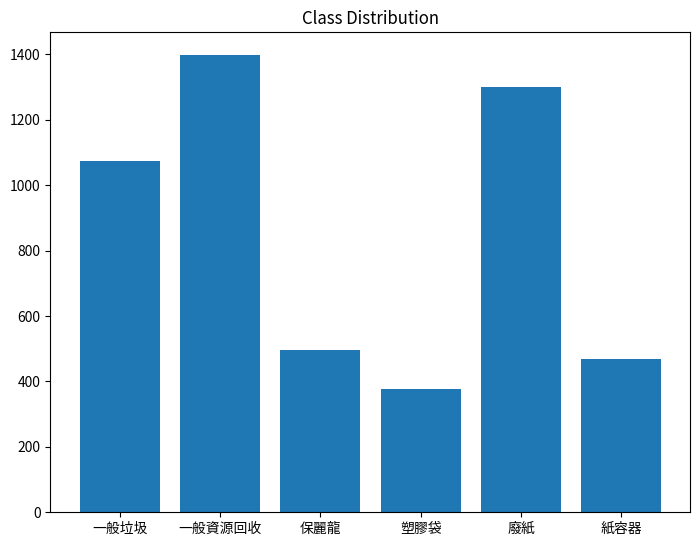

In [ ]:
# display class distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [1074,1398,496,376,1300,468]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

In [ ]:
import os
import random
import shutil
from PIL import Image

# 訓練集和測試集的路徑
PATH_TRAIN = r"/content/drive/MyDrive/垃圾/original_images"
PATH_TEST = r"/content/drive/MyDrive/垃圾/processed_images"

# 類別名稱
class_names = ['一般垃圾', '一般資源回收', '保麗龍', '塑膠袋', '廢紙','紙容器']

# 支持的圖片格式
supported_extensions = {'.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'}

# 創建訓練集和測試集資料夾
for class_name in class_names:
    os.makedirs(os.path.join(PATH_TRAIN, class_name), exist_ok=True)
    os.makedirs(os.path.join(PATH_TEST, class_name), exist_ok=True)

# 分配數據到訓練集和測試集
data_dir = "/content/drive/MyDrive/垃圾"
split_ratio = 0.8  # 訓練集和測試集的分割比例

for class_name in class_names:
    source_dir = os.path.join(data_dir, class_name)
    files = os.listdir(source_dir)
    random.shuffle(files)

    split_point = int(len(files) * split_ratio)
    train_files = files[:split_point]
    test_files = files[split_point:]

    for file in train_files:
        if os.path.splitext(file)[1].lower() in supported_extensions:
            shutil.copy(os.path.join(source_dir, file), os.path.join(PATH_TRAIN, class_name, file))

    for file in test_files:
        if os.path.splitext(file)[1].lower() in supported_extensions:
            shutil.copy(os.path.join(source_dir, file), os.path.join(PATH_TEST, class_name, file))

# 將圖片轉換為灰度圖像並保存到測試集資料夾
for class_name in class_names:
    imagepath = os.path.join(PATH_TRAIN, class_name)
    graypath = os.path.join(PATH_TEST, class_name)
    File_listing = os.listdir(imagepath)

    for file in File_listing:
        if os.path.splitext(file)[1].lower() in supported_extensions:
            im = Image.open(os.path.join(imagepath, file))
            img = im.resize((32, 32))
            gray = img.convert('L')
            gray.save(os.path.join(graypath, file), "JPEG")

print("數據處理完成")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


數據處理完成


In [ ]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

In [ ]:
# 將圖片轉換為灰度圖像並保存到測試集資料夾
for class_name in class_names:
    imagepath = os.path.join(PATH_TRAIN, class_name)
    graypath = os.path.join(PATH_TEST, class_name)
    File_listing = os.listdir(imagepath)

    for file in File_listing:
        if os.path.splitext(file)[1].lower() in supported_extensions:
            try:
                im = Image.open(os.path.join(imagepath, file))
                img = im.resize((32, 32))
                gray = img.convert('L')
                gray.save(os.path.join(graypath, file), "JPEG")
            except Exception as e:
                print(f"Error processing file {file}: {e}")

print("數據處理完成")

數據處理完成


In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
batch_size = 32


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
PATH_TRAIN = r"/content/drive/MyDrive/垃圾/original_images"
PATH_TEST = r"/content/drive/MyDrive/垃圾/processed_images"


In [ ]:
train_data_gen = image_gen.flow_from_directory(
    directory=PATH_TRAIN,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data_gen = image_gen.flow_from_directory(
    directory=PATH_TEST,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4013 images belonging to 6 classes.
Found 5015 images belonging to 6 classes.


In [ ]:
print(f"Found {train_data_gen.samples} images belonging to {train_data_gen.num_classes} classes in the training set.")
print(f"Found {test_data_gen.samples} images belonging to {test_data_gen.num_classes} classes in the test set.")


Found 4013 images belonging to 6 classes in the training set.
Found 5015 images belonging to 6 classes in the test set.


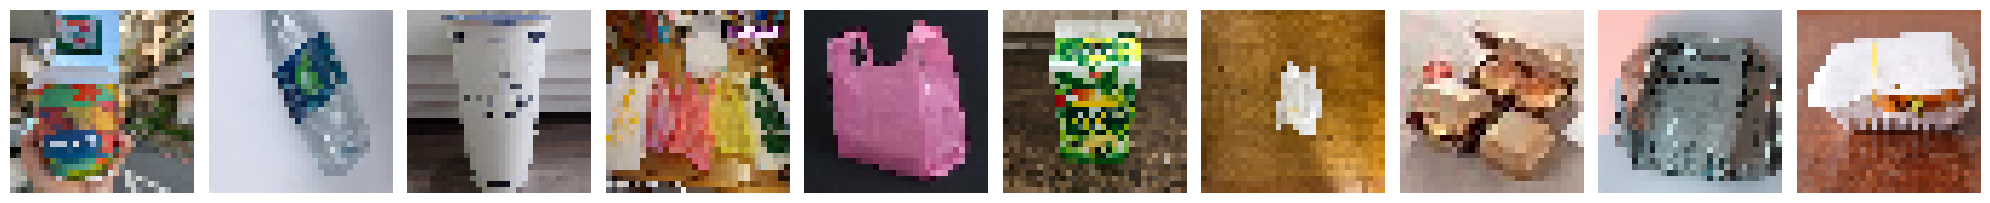

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:10])


In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 設置圖片尺寸和批量大小
IMG_HEIGHT = 32
IMG_WIDTH = 32
batch_size = 32

# 使用 ImageDataGenerator 進行圖像標準化
image_gen = ImageDataGenerator(rescale=1./255)

# 設置資料夾路徑
PATH_TRAIN = r"/content/drive/MyDrive/垃圾/original_images"
PATH_TEST = r"/content/drive/MyDrive/垃圾/processed_images"

# 使用 flow_from_directory 方法加載訓練集和測試集
train_data_gen = image_gen.flow_from_directory(
    directory=PATH_TRAIN,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data_gen = image_gen.flow_from_directory(
    directory=PATH_TEST,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4013 images belonging to 6 classes.
Found 5015 images belonging to 6 classes.


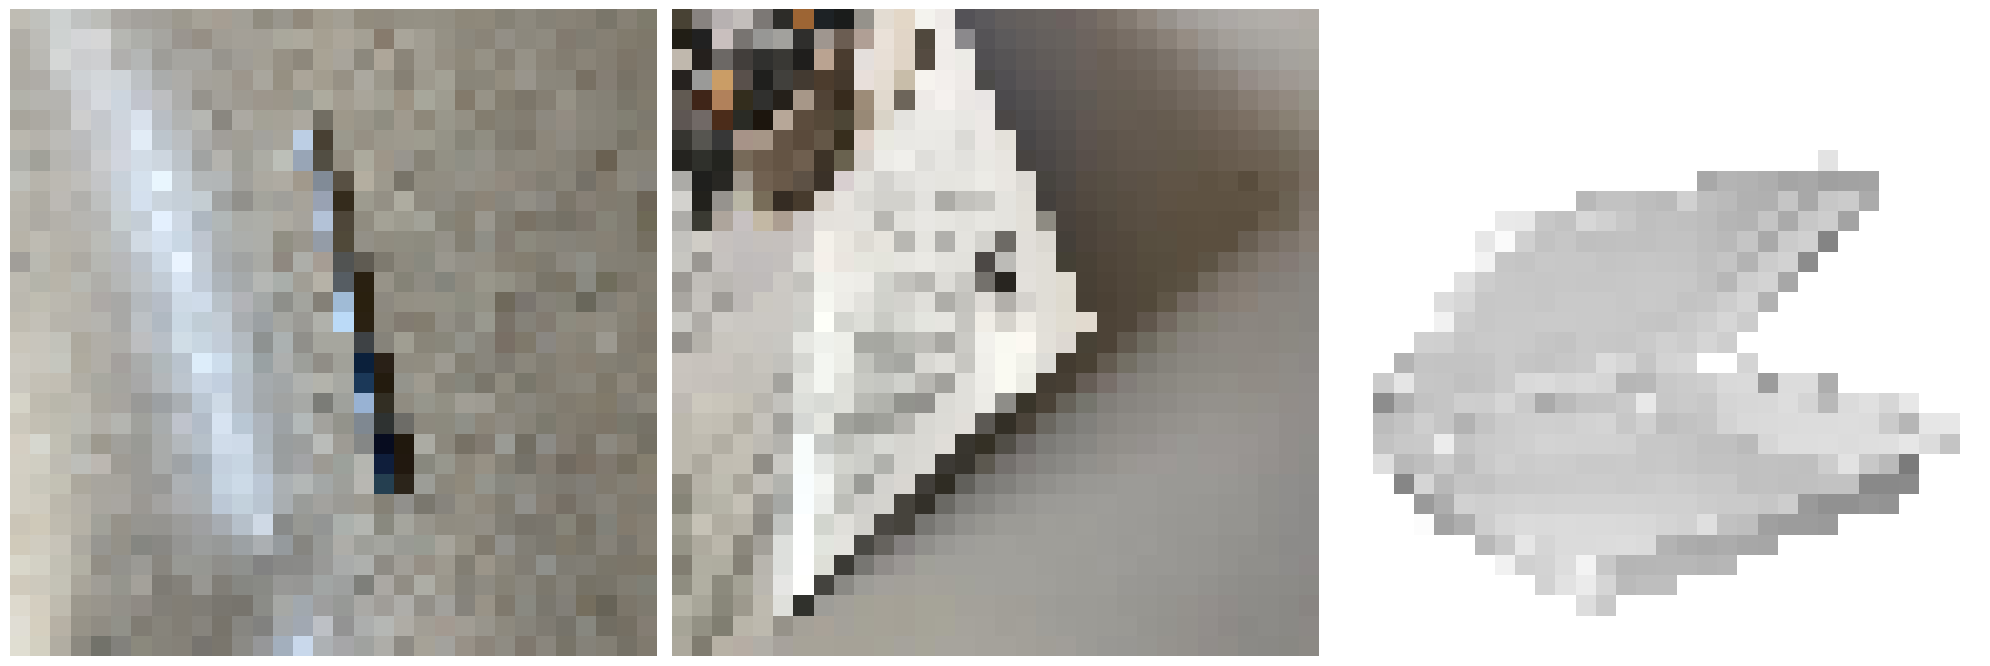

In [ ]:
# 從訓練數據生成器中獲取一批圖片
sample_training_images, _ = next(train_data_gen)

# 顯示前3張圖片
plotImages(sample_training_images[:3])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# 構建神經網絡模型
model = Sequential()

# 卷積層和池化層
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# 平坦層和全連接層
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))  # 輸出層為 6 個類別

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 顯示模型摘要
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [ ]:
# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 9.7 MB/s eta 0:00:00


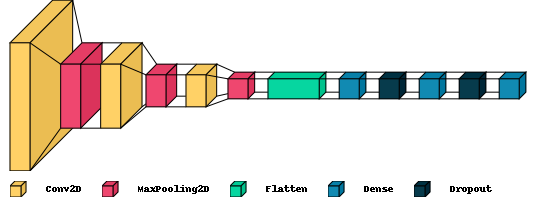

In [ ]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True, spacing=20)


In [ ]:
batch_size = 45
epochs = 55


In [ ]:

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size
)

Epoch 1/55
89/89 [==============================] - 110s 1s/step - loss: 1.6943 - accuracy: 0.2616 - val_loss: 1.6473 - val_accuracy: 0.2812
Epoch 2/55
89/89 [==============================] - 90s 1s/step - loss: 1.6232 - accuracy: 0.3178 - val_loss: 1.5592 - val_accuracy: 0.3539
Epoch 3/55
89/89 [==============================] - 83s 941ms/step - loss: 1.5321 - accuracy: 0.3873 - val_loss: 1.4731 - val_accuracy: 0.4186
Epoch 4/55
89/89 [==============================] - 77s 875ms/step - loss: 1.4186 - accuracy: 0.4312 - val_loss: 1.3678 - val_accuracy: 0.4333
Epoch 5/55
89/89 [==============================] - 67s 761ms/step - loss: 1.3124 - accuracy: 0.4867 - val_loss: 1.4047 - val_accuracy: 0.4001
Epoch 6/55
89/89 [==============================] - 69s 772ms/step - loss: 1.2506 - accuracy: 0.5196 - val_loss: 1.3368 - val_accuracy: 0.4623
Epoch 7/55
89/89 [==============================] - 69s 770ms/step - loss: 1.2141 - accuracy: 0.5292 - val_loss: 1.2709 - val_accuracy: 0.5034
Epoc

In [ ]:
print(os.listdir('/content/drive/Shared drives/'))

['ai', 'Hult prize👚🌱']


In [ ]:
shared_drive_model_path = '/content/drive/Shared drives/ai/models/v2_model.keras'
model.save(shared_drive_model_path)

print(f"Model saved to {shared_drive_model_path}")

Model saved to /content/drive/Shared drives/ai/models/v2_model.keras


Saving metal_007.jpg to metal_007.jpg
1/1 [==============================] - 0s 162ms/step


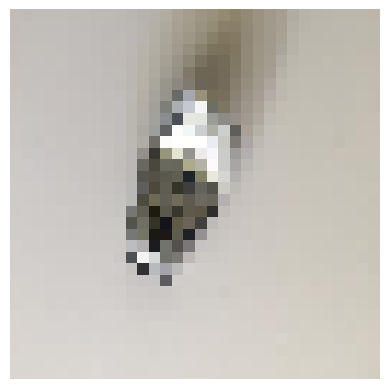

您輸入的垃圾為: 一般資源回收
一般資源回收: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt


class_names = ['一般垃圾', '一般資源回收', '保麗龍', '塑膠袋', '廢紙','紙容器']

class_messages = [
    '一般垃圾: 請注意以下是您所需要丟棄垃圾的時間: 星期一、二、四、五、六。如果您有超大型專用垃圾袋無法容納的單件大型家戶廢棄物，請聯絡您所住地區的清潔隊，約定免費清運的時間和地點。所有投遞的垃圾包必須使用專用的垃圾袋，否則環保局將會予以處罰。如有疑問，請致電環保專線：1999。',
    '一般資源回收: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。',
    '保麗龍: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。',
    '塑膠袋: 如您有此類回收，請注意以下收運時間:星期一、五。如有疑問，請致電環保專線：1999。',
    '廢紙: 如您有此類回收，請注意以下收運時間:星期一、五。如有疑問，請致電環保專線：1999。',
    '紙容器: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。'
]

def upload_and_classify_image():
    # 上傳照片
    uploaded = files.upload()

    for fn in uploaded.keys():
        # load
        path = fn
        img = image.load_img(path, target_size=(32, 32))

        # preprocess
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # 分類
        print(f'您輸入的垃圾為: {class_names[predicted_class]}')
        print(f'{class_messages[predicted_class]}')
upload_and_classify_image()


### **放入圖片**

Saving trash_004.jpg to trash_004 (2).jpg
1/1 [==============================] - 0s 26ms/step


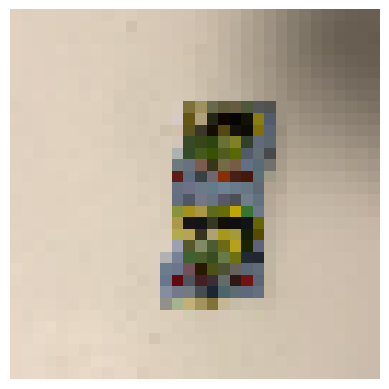

您輸入的垃圾為: 一般資源回收
一般資源回收: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt


class_names = ['一般垃圾', '一般資源回收', '保麗龍', '塑膠袋', '廢紙','紙容器']

class_messages = [
    '一般垃圾: 請注意以下是您所需要丟棄垃圾的時間: 星期一、二、四、五、六。如果您有超大型專用垃圾袋無法容納的單件大型家戶廢棄物，請聯絡您所住地區的清潔隊，約定免費清運的時間和地點。所有投遞的垃圾包必須使用專用的垃圾袋，否則環保局將會予以處罰。如有疑問，請致電環保專線：1999。',
    '一般資源回收: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。',
    '保麗龍: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。',
    '塑膠袋: 如您有此類回收，請注意以下收運時間:星期一、五。如有疑問，請致電環保專線：1999。',
    '廢紙: 如您有此類回收，請注意以下收運時間:星期一、五。如有疑問，請致電環保專線：1999。',
    '紙容器: 如您有此類回收，請注意以下收運時間:星期二、四、六。如有疑問，請致電環保專線：1999。'
]

def upload_and_classify_image():
    # 上傳照片
    uploaded = files.upload()

    for fn in uploaded.keys():
        # load
        path = fn
        img = image.load_img(path, target_size=(32, 32))

        # preprocess
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # 分類
        print(f'您輸入的垃圾為: {class_names[predicted_class]}')
        print(f'{class_messages[predicted_class]}')
upload_and_classify_image()


### **ACCURACY**

157/157 [==============================] - 34s 216ms/step - loss: 1.4599 - accuracy: 0.6050
Test accuracy: 60.49850583076477 Test Loss: 1.459884524345398


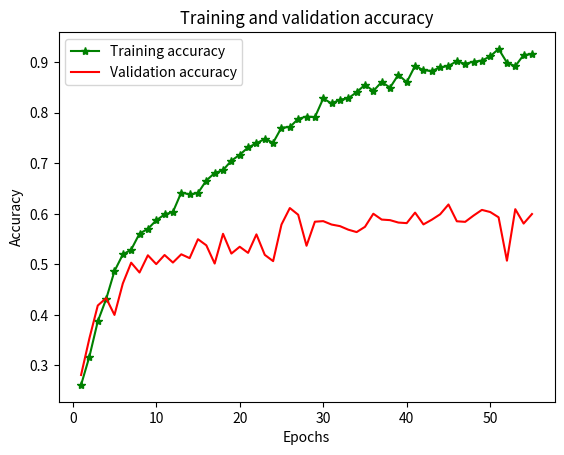

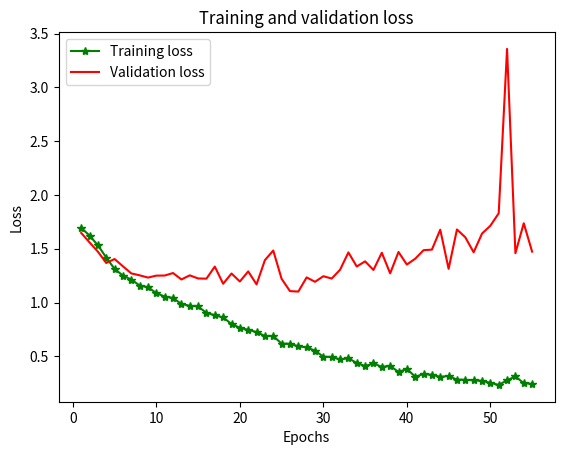

In [ ]:
import matplotlib.pyplot as plt

# 評估模型在測試集上的性能
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {}'.format(test_acc * 100, test_loss))

# 獲取訓練過程中的準確率和損失
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 繪製訓練和驗證準確率
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# 繪製訓練和驗證損失
plt.plot(epochs, train_loss, 'g*-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


157/157 [==============================] - 2s 15ms/step
Confusion Matrix : 
 [[ 569  244  144   41   33   22]
 [  67 1119   75   26   61   30]
 [  50   52  359   21    6    8]
 [  61   47   55  187   12    4]
 [  68  421   41   49  677   39]
 [  53  131   75   23   22  123]]


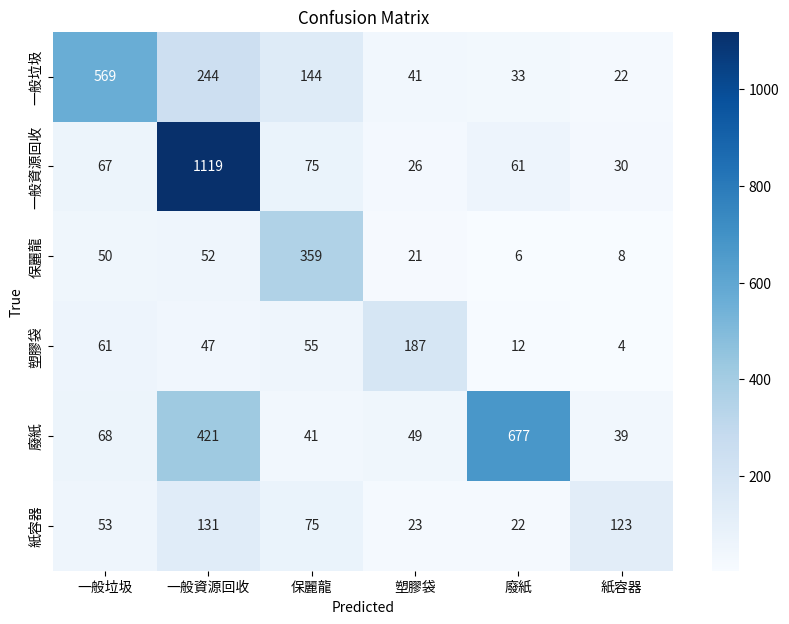

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 從數據生成器中提取所有數據和標籤
def get_data_and_labels(generator):
    data = []
    labels = []
    for _ in range(generator.samples // generator.batch_size + 1):
        batch_data, batch_labels = next(generator)
        data.extend(batch_data)
        labels.extend(batch_labels)
    return np.array(data), np.array(labels)

# 提取訓練和測試數據
train_data, train_labels = get_data_and_labels(train_data_gen)
test_data, test_labels = get_data_and_labels(test_data_gen)

# 進行預測
Y_train_pred = model.predict(train_data)
y_train_pred = np.argmax(Y_train_pred, axis=1)
Y_test_pred = model.predict(test_data)
y_test_pred = np.argmax(Y_test_pred, axis=1)

# 將one-hot編碼的標籤轉換為類別編碼
y_train_true = np.argmax(train_labels, axis=1)
y_test_true = np.argmax(test_labels, axis=1)

# 計算混淆矩陣
cm = confusion_matrix(y_test_true, y_test_pred)

# 打印混淆矩陣
print("Confusion Matrix : \n", cm)

# 繪製混淆矩陣
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
